# K-Means Clustering

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import umap

In [32]:
df = pd.read_csv("./clean_dataset.csv")

def exclude_columns(df, columns_to_exclude):
    return df.drop(columns=columns_to_exclude)

columns_to_exclude = ['MildOutlier', "Class"]
df_num = exclude_columns(df, columns_to_exclude)

In [45]:
def plot_umap(embedding_df, title, ax, hue="Cluster", palette="viridis", n_clusters=None, style=None):
    # Adjust the palette based on the number of unique hue values if n_clusters is not given
    unique_hue_values = embedding_df[hue].nunique() if n_clusters is None else n_clusters
    palette = sns.color_palette(palette, n_colors=unique_hue_values)
    
    # Ensure style column exists in embedding_df
    if style and style in embedding_df.columns:
        # Plot non-outliers with default 'o' marker
        sns.scatterplot(
            data=embedding_df[embedding_df[style] == 0],  # Select non-outliers
            x="UMAP1",
            y="UMAP2",
            hue=hue,
            palette=palette,
            ax=ax,
            legend="full",
            marker='o'
        )
        
        # Overlay outliers with 'X' marker if any outliers are present
        if embedding_df[style].any():
            sns.scatterplot(
                data=embedding_df[embedding_df[style] == 1],  # Select outliers
                x="UMAP1",
                y="UMAP2",
                hue=hue,
                palette=palette,
                ax=ax,
                legend=False,
                marker='X'
            )
    else:
        # If no style column, plot all points with default 'o' marker
        sns.scatterplot(
            data=embedding_df,
            x="UMAP1",
            y="UMAP2",
            hue=hue,
            palette=palette,
            ax=ax,
            legend="full",
            marker='o'
        )
    
    ax.legend(title=title)
    ax.set_title(f"UMAP projection with {title}")


/tmp/ipykernel_36341/1302268958.py:22: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(


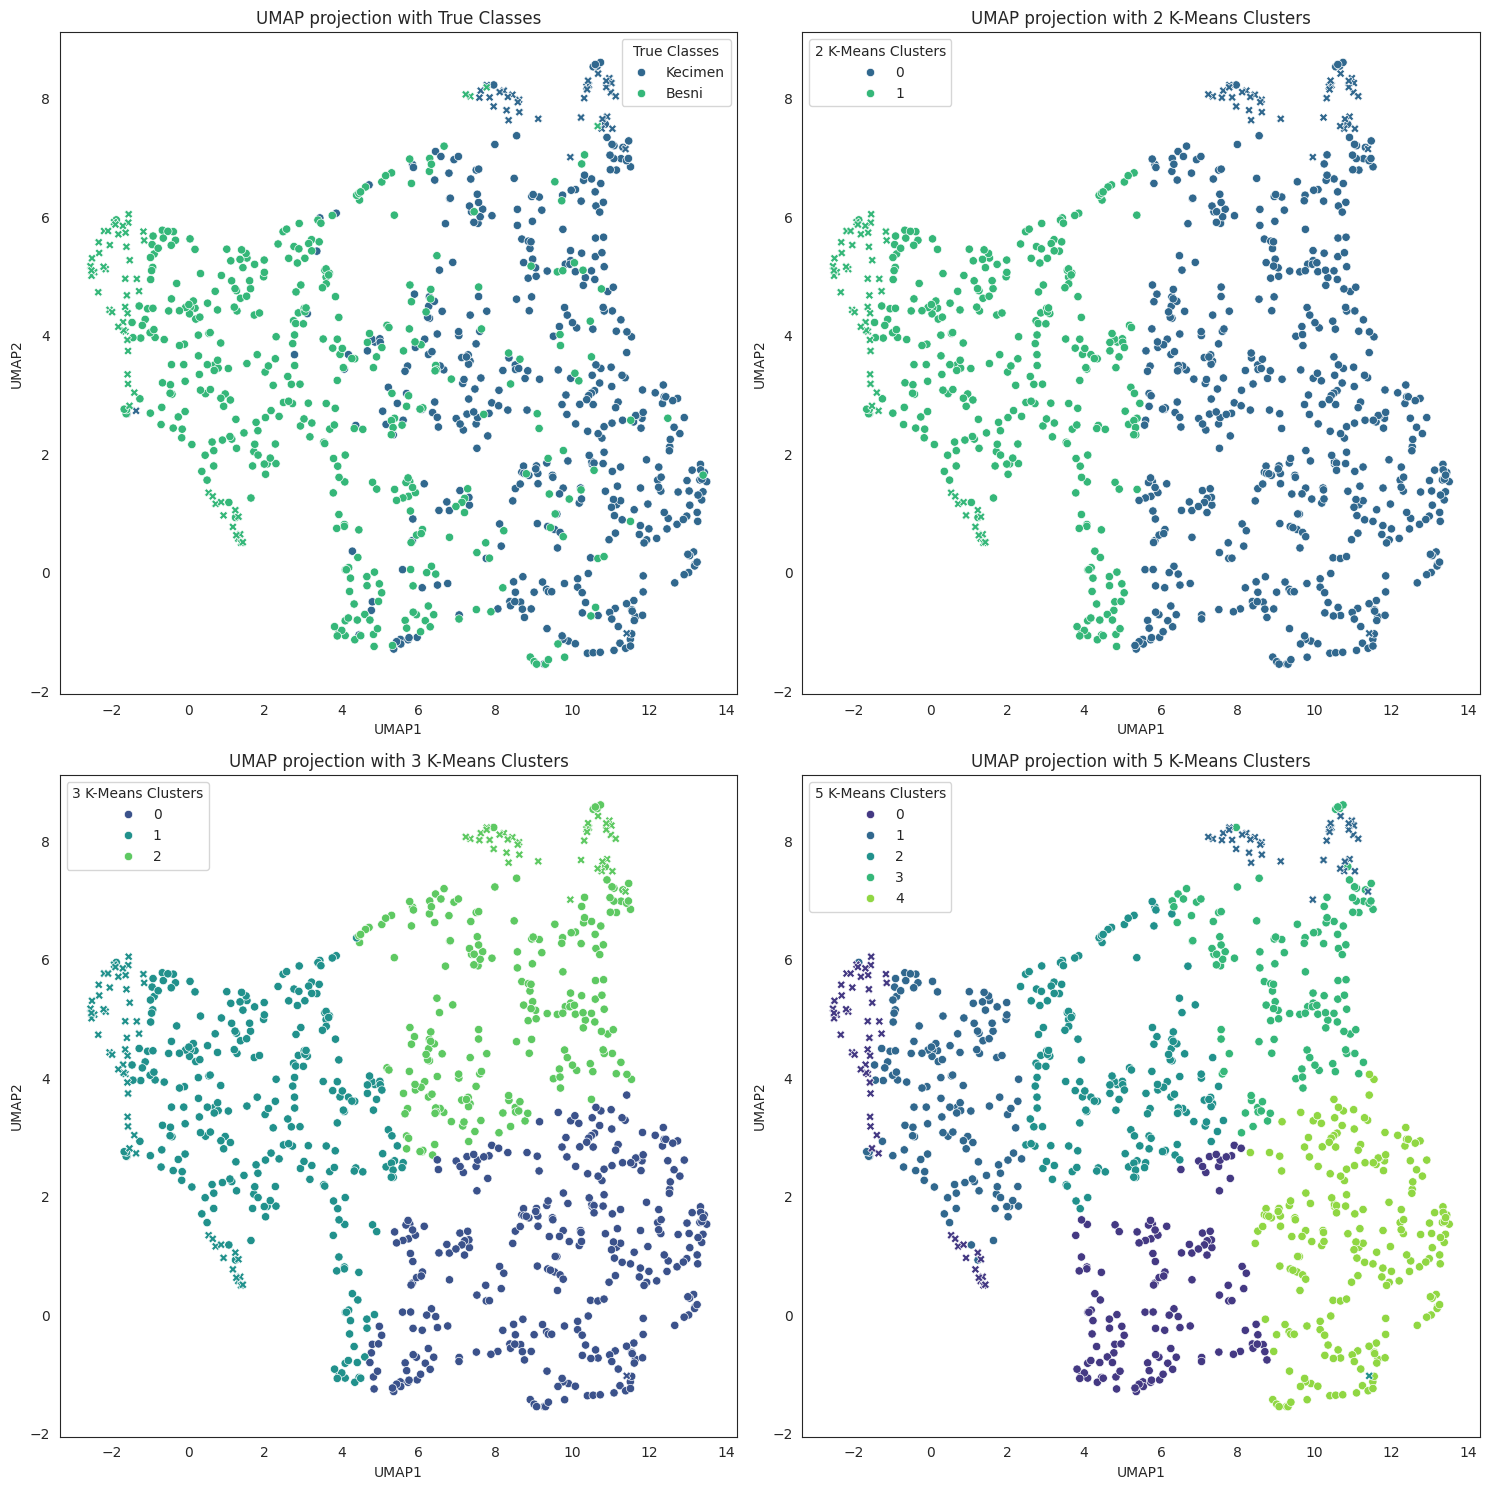

In [46]:
reducer = umap.UMAP(
    n_neighbors=10, min_dist=0.3, metric="euclidean", random_state=69, n_jobs=1
)
embedding = reducer.fit_transform(df_num)

sns.set_style("white")
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for row, col, n_clusters in [(0, 1, 2), (1, 0, 3), (1, 1, 5)]:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=69)
    kmeans_clusters = kmeans.fit_predict(embedding)

    embedding_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
    embedding_df['KMeans_Cluster'] = kmeans_clusters
    embedding_df["MildOutlier"] = df["MildOutlier"]  

    plot_umap(
        embedding_df,
        f"{n_clusters} K-Means Clusters",
        axs[row, col],
        hue="KMeans_Cluster",
        n_clusters=n_clusters,
        style='MildOutlier'
    )

embedding_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
embedding_df["MildOutlier"] = df["MildOutlier"] 
embedding_df["Cluster"] = df["Class"]  
plot_umap(
    embedding_df,
    "True Classes",
    axs[0, 0],
    hue="Cluster",
    style='MildOutlier'
)

plt.tight_layout()
plt.show()